In [1]:
# Library ultralytics YOLOv8
!pip install ultralytics

# Import library
import os
import shutil
from ultralytics import YOLO
from google.colab import drive
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np

print("✅ Setup Selesai. Library yang dibutuhkan sudah siap.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Setup Selesai. Library yang dibutuhkan sudah siap.


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path dataset di Google Drive
dszip_drive = '/content/drive/MyDrive/YOLOv8 Learning AI Expression Detection/archive.zip'

# path file file local
dszip_local = '/content/dataset.zip'
dsextract_local = '/content/YOLO_format' # Folder hasil ekstrak di lokal

# copy zip to local
print(f"Menyalin dataset dari {dszip_drive} ke {dszip_local}...")
!cp "{dszip_drive}" "{dszip_local}"
print("Copy Zip ke Local.")

# extract dataset ke local
print(f"Mengekstrak {dszip_local} ke {dsextract_local}...")
if os.path.exists(dsextract_local): # jika folder ada, hapus
    shutil.rmtree(dsextract_local) # buat folder baru
!unzip -q "{dszip_local}" -d "{dsextract_local}"
print(f"Dataset extracted ke lokal Colab: {dsextract_local}")

Menyalin dataset dari /content/drive/MyDrive/YOLOv8 Learning AI Expression Detection/archive.zip ke /content/dataset.zip...
Copy Zip ke Local.
Mengekstrak /content/dataset.zip ke /content/YOLO_format...
Dataset extracted ke lokal Colab: /content/YOLO_format


In [ ]:
# Path local dataset
train_img_path = '/content/YOLO_format/YOLO_format/train/images'
valid_img_path = '/content/YOLO_format/YOLO_format/valid'
test_img_path = '/content/YOLO_format/YOLO_format/test/images'

# Nama dan urutan kelas sesuai dataset kaggle
isi_yaml = f"""
train: {train_img_path}
val: {valid_img_path}
test: {test_img_path}

# Definisi Kelas (Names)
names:
  0: Anger
  1: Contempt
  2: Disgust
  3: Fear
  4: Happy
  5: Neutral
  6: Sad
  7: Surprise
"""

# Menyimpan konfigurasi ke file .yaml baru
with open("data_lokal.yaml", "w") as f:
    f.write(isi_yaml)

print("File 'data_lokal.yaml' berhasil dibuat.")

File 'data_lokal.yaml' berhasil dibuat.


In [ ]:
# Load model pre-trained
model = YOLO('yolov8n.pt')

# Mulai training dengan file yaml
results = model.train(
    data='data_lokal.yaml',
    epochs=50,
    imgsz=416,
    batch=32,
    project='/content/hasil_training', # Simpan hasil di lokal dulu
    name='expressionai'
)

print("\n✅ Finished Training Model!")

Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data_lokal.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=expressionai4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

In [ ]:
# Path training di lokal
sumber_hasil_training = '/content/hasil_training/expressionai4'

# Path training drive
tujuan_di_drive = '/content/drive/MyDrive/YOLOv8 Learning AI Expression Detection/Hasil Training/'

# Folder training di drive
os.makedirs(tujuan_di_drive, exist_ok=True)

# Salin seluruh folder hasil training ke Google Drive
!cp -r "{sumber_hasil_training}" "{tujuan_di_drive}"

print(f"Hasil training disimpan di: {tujuan_di_drive}")

Menyimpan hasil training ke Google Drive...
Hasil training disimpan di: /content/drive/MyDrive/YOLOv8 Learning AI Expression Detection/Hasil Training/


In [4]:
import os

# COPY HASIL TRAINING DARI DRIVE KE LOCAL COLAB
# Lokasi model di Google Drive
trainingmodeldrive = '/content/drive/MyDrive/YOLOv8 Learning AI Expression Detection/Hasil Training/expressionai4/weights/best.pt'

# Lokasi penyimpanan di lokal Colab
trainingmodellocal = '/content/best.pt'

# Copy model dari Drive ke lokal Colab
print(f"Mencari model di: {trainingmodeldrive}")
if os.path.exists(trainingmodeldrive):
    print("Model ditemukan! Menyalin ke lingkungan lokal Colab...")
    !cp "{trainingmodeldrive}" "{trainingmodellocal}"
    print(f"✅ Model berhasil disalin dan siap digunakan di: {trainingmodellocal}")
else:
    print(f"🔴 Error: File model tidak ditemukan di Google Drive.")
    print("Pastikan path sudah benar dan proses training sudah disimpan sebelumnya.")

Mencari model di: /content/drive/MyDrive/YOLOv8 Learning AI Expression Detection/Hasil Training/expressionai4/weights/best.pt
Model ditemukan! Menyalin ke lingkungan lokal Colab...
✅ Model berhasil disalin dan siap digunakan di: /content/best.pt


In [ ]:
# import library
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2

# Camera
def video_capture(quality=0.8):
  js = Javascript('''
    async function createWebcamStream(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('createWebcamStream({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  image = cv2.imdecode(np.frombuffer(binary, np.uint8), cv2.IMREAD_COLOR)
  return image

# model training yang sudah di copy
drivetolocalmodel = '/content/best.pt'

# Load model
try:
    model_custom = YOLO(drivetolocalmodel)
    print("✅ Model custom berhasil dimuat.")

    print("\nTekan tombol 'Capture' di bawah untuk mengambil gambar dari webcam dan melakukan deteksi.")
    print("Untuk menghentikan loop, interupsi kernel (Tombol Stop ⏹️ di Colab).")

    # Loop
    while True:
        frame = video_capture()
        results = model_custom(frame, conf=0.4)
        annotated_frame = results[0].plot()
        cv2_imshow(annotated_frame)

except Exception as e:
    print(f"\n🔴 Loop dihentikan. Error: {e}")
    print("Pastikan Segment 4.6 sudah dijalankan dan model berhasil dimuat.")

✅ Model custom berhasil dimuat.

Silakan upload file gambar (jpg, png, dsb.) untuk dideteksi:


Saving image_2025-10-26_182122906.png to image_2025-10-26_182122906.png

Sedang memproses file: image_2025-10-26_182122906.png...

0: 416x416 1 Contempt, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Menampilkan hasil deteksi:


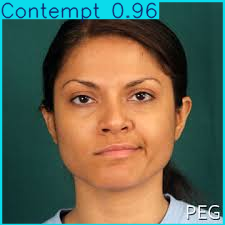

In [6]:
from ultralytics import YOLO
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

drivetolocalmodel = '/content/best.pt'

try:
        model_custom = YOLO(drivetolocalmodel)
        print("✅ Model custom berhasil dimuat.")

        print("\nSilakan upload file gambar (jpg, png, dsb.) untuk dideteksi:")
        uploaded = files.upload()

        if not uploaded:
            print("\nProses dibatalkan. Tidak ada file yang diupload.")
        else:
            filename = list(uploaded.keys())[0]
            file_bytes = uploaded[filename]

            print(f"\nMemproses file: {filename}...")

            nparr = np.frombuffer(file_bytes, np.uint8)
            frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

            results = model_custom(frame, conf=0.4)

            annotated_frame = results[0].plot()

            print("Menampilkan hasil deteksi:")
            cv2_imshow(annotated_frame)

except Exception as e:
    print(f"\n🔴 Terjadi error: {e}")